In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
env = GridworldEnv('1') # Number of task 

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Q-Learning 

In [3]:
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [21]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
record=True
from algorithms.Q_Learning import Q_Learning_Agents

env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==3000:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    #print(reward_1)
    #print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

GAME 1

GAME 2

GAME 3

GAME 4

GAME 5

GAME 6

GAME 7

GAME 8

GAME 9

GAME 10

GAME 11

GAME 12

GAME 13

GAME 14

GAME 15

GAME 16

GAME 17

GAME 18

GAME 19

GAME 20

GAME 21

GAME 22

GAME 23

GAME 24

GAME 25

GAME 26

GAME 27

GAME 28

GAME 29

GAME 30

GAME 31

GAME 32

GAME 33

GAME 34

GAME 35

GAME 36

GAME 37

GAME 38

GAME 39

GAME 40

GAME 41

GAME 42

GAME 43

GAME 44

GAME 45

GAME 46

GAME 47

GAME 48

GAME 49

GAME 50

GAME 51

GAME 52

GAME 53

GAME 54

GAME 55

GAME 56

GAME 57

GAME 58

GAME 59

GAME 60

GAME 61

GAME 62

GAME 63

GAME 64

GAME 65

GAME 66

GAME 67

GAME 68

GAME 69

GAME 70

GAME 71

GAME 72

GAME 73

GAME 74

GAME 75

GAME 76

GAME 77

GAME 78

GAME 79

GAME 80

GAME 81

GAME 82

GAME 83

GAME 84

GAME 85

GAME 86

GAME 87

GAME 88

GAME 89

GAME 90

GAME 91

GAME 92

GAME 93

GAME 94

GAME 95

GAME 96

GAME 97

GAME 98

GAME 99

GAME 100

GAME 101

GAME 102

GAME 103

GAME 104

GAME 105

GAME 106

GAME 107

GAME 108

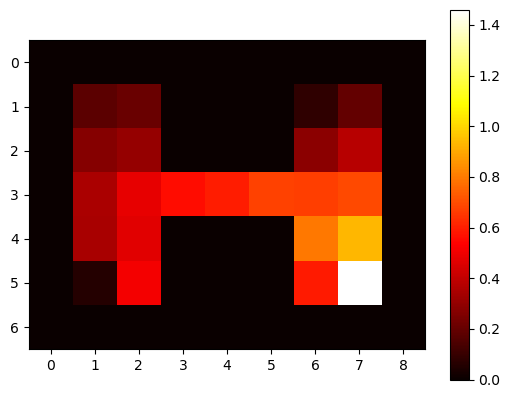

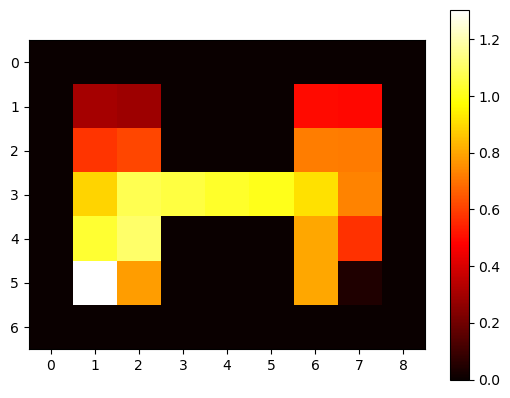

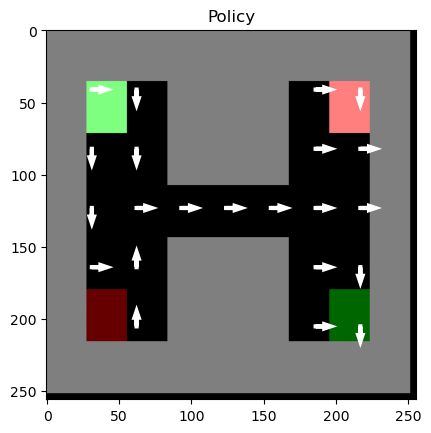

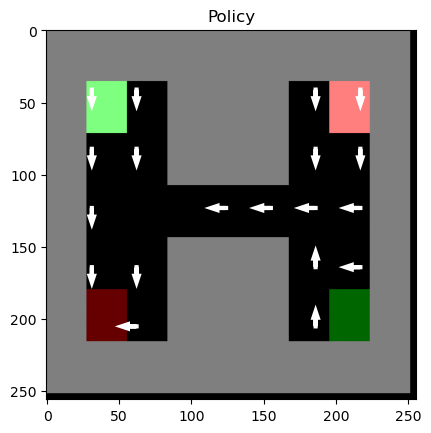

In [22]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Q-Learning with rollout

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [2]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 1000
from algorithms.Q_Learning_rollout import Q_Learning_Rollout_Agents


env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Rollout_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,10)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==1050:
        epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

3.4000000000012136
76.19999999999993
GAME 1

75.09999999999991
66.7999999999998
GAME 2

38.499999999999396
57.499999999999666
GAME 3

79.79999999999998
58.69999999999968
GAME 4

84.70000000000005
64.19999999999976
GAME 5

30.39999999999968
2.8000000000012477
GAME 6

76.59999999999994
68.89999999999984
GAME 7

90.10000000000002
-99.8999999999986
GAME 8

77.09999999999994
56.99999999999966
GAME 9

11.90000000000073
44.99999999999949
GAME 10

40.79999999999943
-97.49999999999874
GAME 11

-98.89999999999866
73.9999999999999
GAME 12

-90.89999999999911
-96.49999999999879
GAME 13

74.79999999999991
-98.69999999999867
GAME 14

87.50000000000003
80.6
GAME 15

62.19999999999973
54.89999999999963
GAME 16

63.19999999999975
40.99999999999943
GAME 17

23.90000000000005
-97.29999999999875
GAME 18

90.30000000000001
-99.8999999999986
GAME 19

28.899999999999764
80.69999999999999
GAME 20

22.400000000000134
-96.99999999999876
GAME 21

88.20000000000003
40.39999999999942


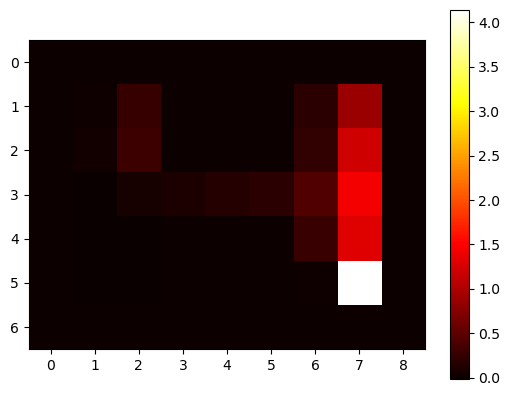

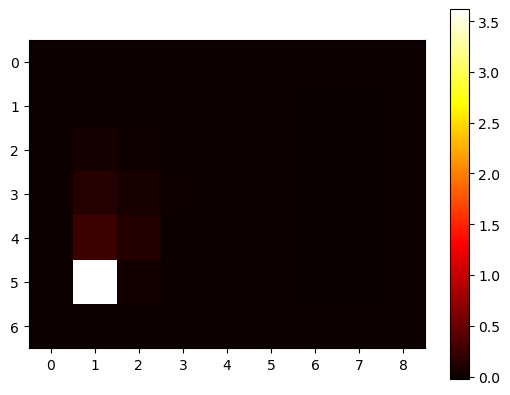

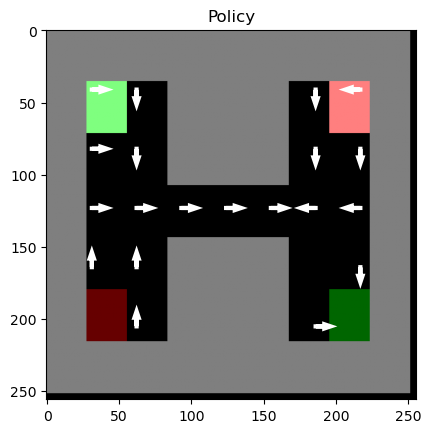

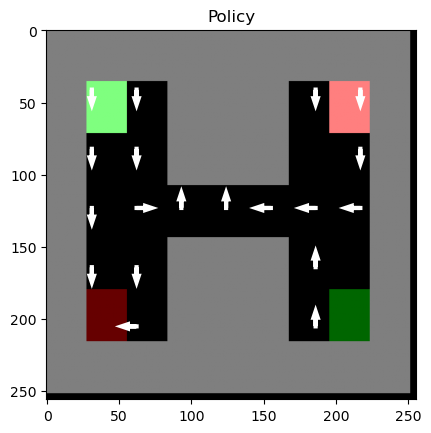

In [3]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Soft Q-Learning without rollout

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [5]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.8
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 1000
from algorithms.Soft_Q_Learning_without_rollout import Soft_without_rollout


env = GridworldEnv('1')
env.reset()
agents = Soft_without_rollout(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==1050:
        total_reward,reward_1,reward_2=agents.learn(True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        #epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn()
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

75.99999999999993
38.19999999999939
GAME 1

60.899999999999714
67.29999999999981
GAME 2

68.59999999999982
40.39999999999942
GAME 3

39.69999999999941
44.799999999999486
GAME 4

52.09999999999959
62.59999999999974
GAME 5

60.999999999999716
59.7999999999997
GAME 6

52.499999999999595
84.30000000000004
GAME 7

95.1
-99.9999999999986
GAME 8

89.80000000000003
-99.69999999999861
GAME 9

87.40000000000003
-99.7999999999986
GAME 10

91.50000000000001
-99.69999999999861
GAME 11

-95.09999999999887
-95.19999999999887
GAME 12

91.50000000000001
-99.9999999999986
GAME 13

97.0
-99.59999999999862
GAME 14

70.19999999999985
-98.99999999999865
GAME 15

70.29999999999984
-99.19999999999864
GAME 16

87.60000000000002
86.00000000000003
GAME 17

77.89999999999995
73.7999999999999
GAME 18

64.99999999999977
62.79999999999974
GAME 19

39.49999999999941
39.69999999999941
GAME 20

67.0999999999998
94.2
GAME 21

-99.7999999999986
86.80000000000003
GAME 22

91.00000000000001
80

/Users/samueloliveira/Documents/Masters/MAAI/multi-agent_distral/algorithms/Soft_Q_Learning_without_rollout.py:123: RuntimeWarning: overflow encountered in exp
  q_next_max_2 = self.tau * np.log(np.sum(np.exp(self.q_val_2[tuple(a2_next_state)] / self.tau)))
/Users/samueloliveira/Documents/Masters/MAAI/multi-agent_distral/algorithms/Soft_Q_Learning_without_rollout.py:30: RuntimeWarning: overflow encountered in exp
  action_probs = np.exp(q_values / self.tau) / np.sum(np.exp(q_values / self.tau))
/Users/samueloliveira/Documents/Masters/MAAI/multi-agent_distral/algorithms/Soft_Q_Learning_without_rollout.py:30: RuntimeWarning: invalid value encountered in divide
  action_probs = np.exp(q_values / self.tau) / np.sum(np.exp(q_values / self.tau))


ValueError: probabilities contain NaN

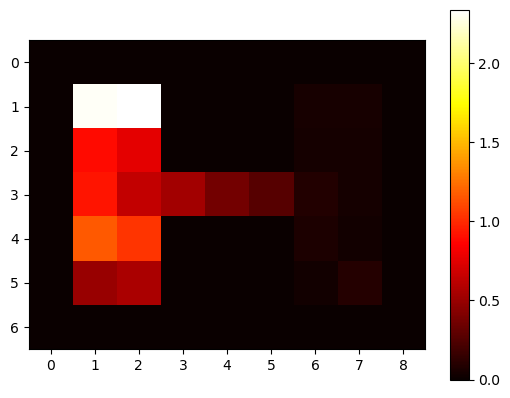

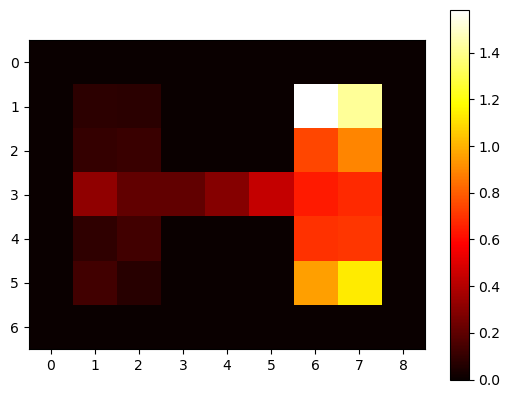

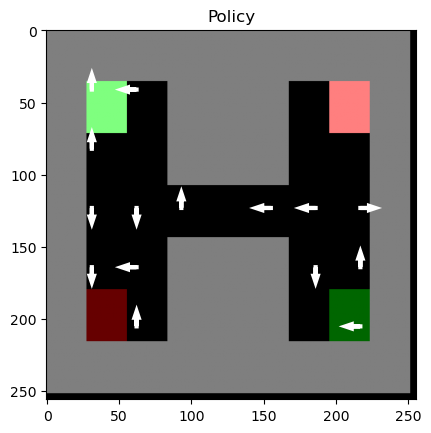

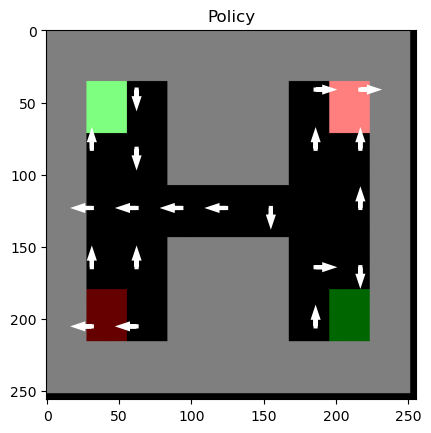

In [4]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)